In [43]:
pip install --upgrade git+https://github.com/siavash-saki/tesspy

  Cloning https://github.com/siavash-saki/tesspy to c:\users\hamann\appdata\local\temp\pip-req-build-s71g9ei7
  Resolved https://github.com/siavash-saki/tesspy to commit 384696db98f1a32b32788d1d914ebcddbcac6357
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'



  Running command git clone --filter=blob:none --quiet https://github.com/siavash-saki/tesspy 'C:\Users\Hamann\AppData\Local\Temp\pip-req-build-s71g9ei7'


In [1]:
from tesspy.tessellation import Tessellation
from tesspy.poi_data import RoadData, POIdata
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings('ignore')

In [10]:
city = Tessellation('Key West')

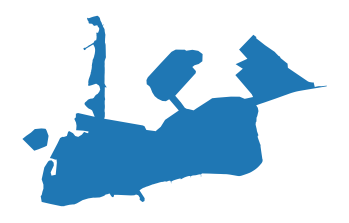

In [11]:
city_polygon = city.get_polygon()
city_polygon.plot().set_axis_off()

# Data Collection

In [16]:
city_POI = POIdata(city_polygon, ["amenity", "building"], 60, False).get_poi_data()

# only collecting buildung data
city_building = POIdata(city_polygon, ["building"], 60, False).get_poi_data()


city_road = RoadData(city_polygon, 
                     detail_deg=None, 
                     split_roads=True,
                     verbose=True).get_road_network()

Creating custom filter for all highway types
Created custom filter is ['highway'~'motorway|trunk|primary|secondary|tertiary|residential|unclassified|motorway_link|trunk_link|primary_link|secondary_link|living_street|pedestrian|track|bus_guideway|footway|path|service|cycleway']
Collection street network data
Splitting the linestring, such that each linestring has exactly 2 points.
Collected data has 19589 street segments


# Tessellations

## Squares and Hexagons

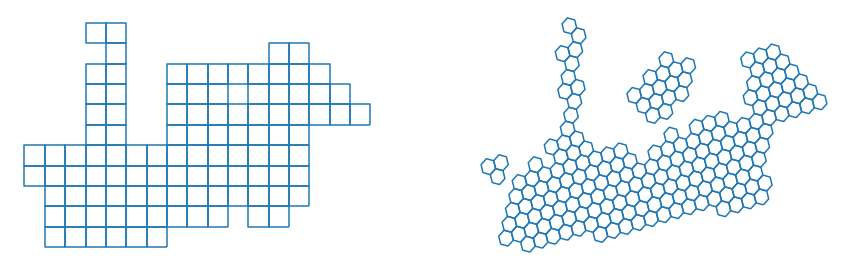

In [18]:
#user input is the resolution
city_sq = city.squares(16)

city_hex = city.hexagons(9)

fig,axes = plt.subplots(1,2, figsize=(15,10))

city_sq.boundary.plot(ax=axes[0])
axes[0].set_axis_off()

city_hex.boundary.plot(ax=axes[1])
axes[1].set_axis_off()

## Adaptive Squares

In [23]:
# Adaptive Squares using only building data
city_asq = city.adaptive_squares(start_resolution=15, 
                                 poi_categories=["building"], 
                                 threshold=100, 
                                 timeout=60, 
                                 verbose=False)

<AxesSubplot:>

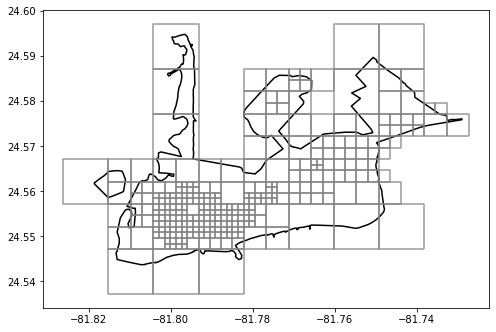

In [24]:
ax = city_polygon.boundary.plot(color='black', figsize=(8,10))
city_asq.boundary.plot(ax=ax, color="grey", alpha=0.8)

In [25]:
# Adaptive Squares using only building data
city_asq_2 = city.adaptive_squares(start_resolution=14, 
                                 poi_categories=["amenity","building"], 
                                 threshold=100, 
                                 timeout=60, 
                                 verbose=False)

<AxesSubplot:>

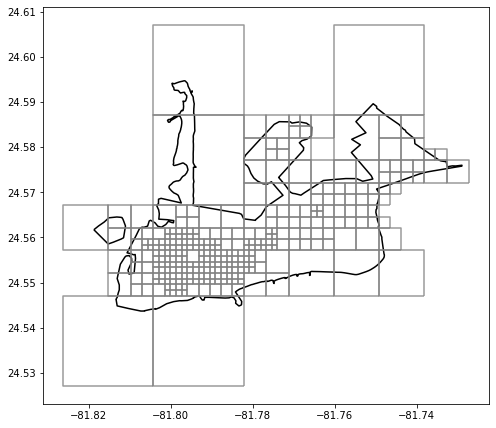

In [26]:
ax = city_polygon.boundary.plot(color='black', figsize=(8,10))
city_asq_2.boundary.plot(ax=ax, color="grey", alpha=0.8)

## Voronoi Polygons

In [27]:
city_kmeans = city.voronoi(cluster_algo="k-means",
                          poi_categories=["amenity"],
                          timeout=60,
                          n_polygons=len(city_asq),
                          verbose=False)

<AxesSubplot:>

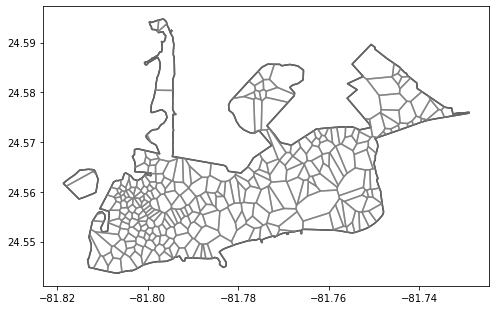

In [28]:
ax = city_polygon.boundary.plot(color='black', figsize=(8,10))
city_kmeans.boundary.plot(ax=ax, color="grey", alpha=0.8)

In [40]:
city_hdbscan = city.voronoi(cluster_algo="hdbscan",
                          poi_categories=["amenity", "building"],
                          timeout=60,
                          min_cluster_size=5,
                          verbose=True)

HDBSCAN Clustering... This can take a while...
Creating Voronoi polygons...


<AxesSubplot:>

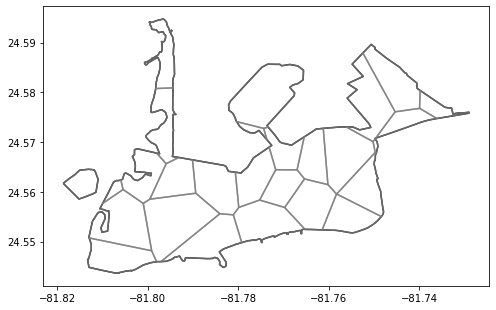

In [41]:
ax = city_polygon.boundary.plot(color='black', figsize=(8,10))
city_hdbscan.boundary.plot(ax=ax, color="grey", alpha=0.8)

## City Blocks

In [ ]:
city_cb = city.city_blocks(number_of_LGUs=2500,
                          detail_deg=None,
                          split_roads=True,
                          verbose=True)

Creating custom filter for all highway types
Created custom filter is ['highway'~'motorway|trunk|primary|secondary|tertiary|residential|unclassified|motorway_link|trunk_link|primary_link|secondary_link|living_street|pedestrian|track|bus_guideway|footway|path|service|cycleway']
Collection street network data


In [ ]:
ax = city_polygon.boundary.plot(color='black', figsize=(8,10))
city_cb.boundary.plot(ax=ax, color="grey", alpha=0.8)